In [18]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Q. Output variable -> y.y -> Whether the client has subscribed a term deposit or not .Binomial ("yes" or "no")

### Import data

In [19]:
bank = pd.read_csv("bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### EDA
#### Data Understanding

In [20]:
bank.shape

(45211, 17)

In [21]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [22]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [25]:
bank.duplicated().sum()

0

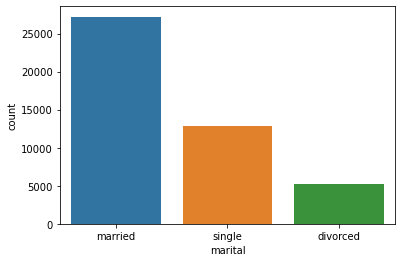

In [28]:
sns.countplot(x='marital',y=None,data = bank)
plt.show()

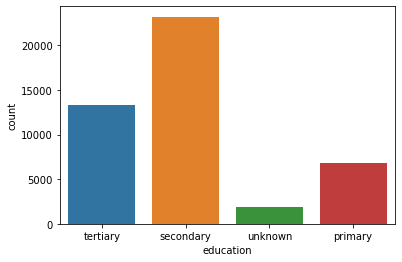

In [29]:
sns.countplot(x='education',y=None,data = bank)
plt.show()

In [35]:
import plotly.express as px
fig = px.pie(bank, names='job')
fig.show()

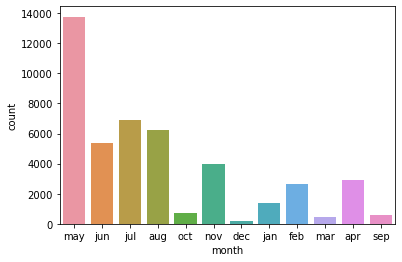

In [31]:
sns.countplot(x='month',y=None,data = bank)
plt.show()

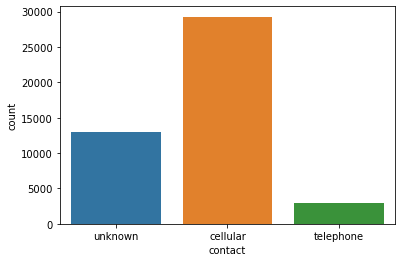

In [32]:
sns.countplot(x='contact',y=None,data = bank)
plt.show()

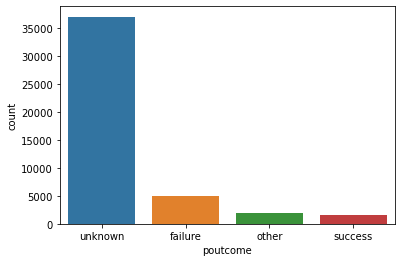

In [33]:
sns.countplot(x='poutcome',y=None,data = bank)
plt.show()

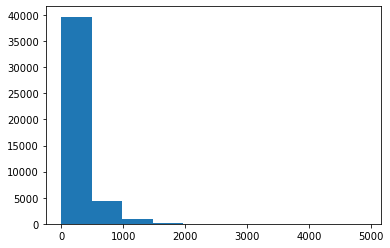

In [37]:
plt.hist(x = 'duration',data = bank) 
plt.show()

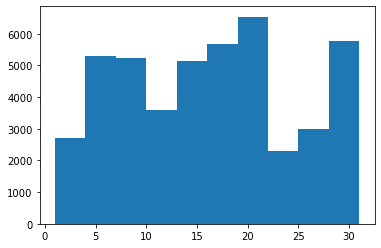

In [39]:
plt.hist(x = 'day',data = bank) 
plt.show()

#### Data Preparation

In [40]:
bank['default'] = np.where(bank['default'] =="yes",1,0)
bank['housing'] = np.where(bank['housing'] =="yes",1,0)
bank['loan'] = np.where(bank['loan'] =="yes",1,0)
bank['y'] = np.where(bank['y'] =="yes",1,0)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [41]:
bank=pd.get_dummies(bank,columns=['job','marital','education','contact','month','poutcome'])
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [11]:
bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


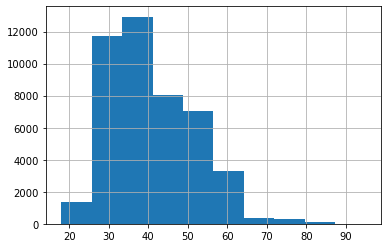

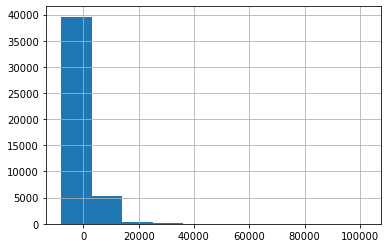

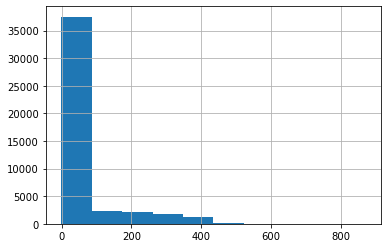

In [52]:
bank['age'].hist()
plt.show()
bank['balance'].hist()
plt.show()
bank['pdays'].hist()
plt.show()

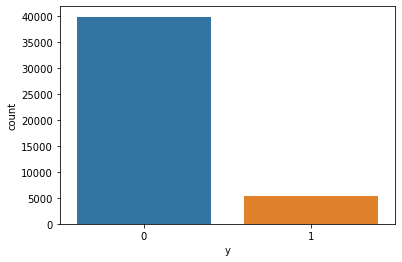

In [13]:
sns.countplot(x='y',y=None,data = bank)
plt.show()

In [43]:
fig = px.pie(bank, names='y')
fig.show()

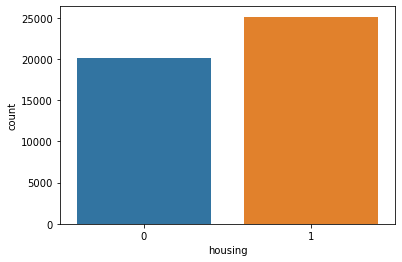

In [14]:
sns.countplot(x='housing',y=None,data = bank)
plt.show()

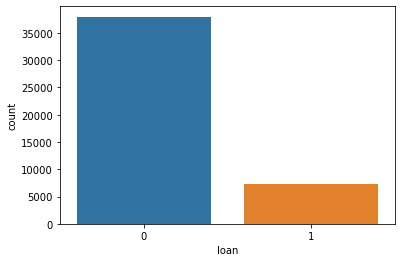

In [15]:
sns.countplot(x='loan',y=None,data = bank)
plt.show()

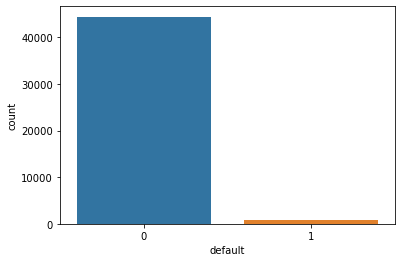

In [16]:
sns.countplot(x='default',y=None,data = bank)
plt.show()

### Model Building

In [13]:
X=bank.drop('y',axis=1)
Y=bank[['y']]

In [14]:
X.shape,Y.shape

((45211, 48), (45211, 1))

### Model Training

In [15]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

### Predict for X dataset

In [16]:
classifier.coef_

array([[-1.82949395e-02, -2.07994540e-02,  1.91658966e-05,
        -7.60157868e-01, -2.19076918e-01, -9.67209112e-03,
         3.96219185e-03, -4.18774074e-01,  1.93871537e-03,
        -1.40012694e-01, -3.06433985e-02, -2.87903367e-01,
        -3.06353727e-02, -9.90541129e-03,  7.34602842e-03,
         1.88574644e-01, -1.82000923e-02, -1.00956576e-01,
         3.42418808e-02, -7.93146663e-02,  3.32299508e-03,
         2.80008975e-03,  1.83721670e-02, -1.97069333e-01,
        -1.42576081e-01, -7.92568844e-02, -3.09480964e-01,
         5.20051829e-02,  1.54594184e-02,  1.04108913e-01,
         5.76010766e-02, -4.82983236e-01,  4.66375808e-02,
         2.73024619e-02,  3.26733104e-02, -1.63519659e-02,
        -1.53479439e-02, -9.32457428e-02, -6.21296498e-02,
         9.85585244e-02, -4.71393248e-01, -6.48947063e-02,
         1.12162082e-01,  8.47560503e-02, -1.53704969e-01,
        -3.63625257e-02,  3.53690927e-01, -4.84896678e-01]])

In [17]:
beta_coefficients = pd.Series(classifier.coef_[0])
beta_coefficients

0    -0.018295
1    -0.020799
2     0.000019
3    -0.760158
4    -0.219077
5    -0.009672
6     0.003962
7    -0.418774
8     0.001939
9    -0.140013
10   -0.030643
11   -0.287903
12   -0.030635
13   -0.009905
14    0.007346
15    0.188575
16   -0.018200
17   -0.100957
18    0.034242
19   -0.079315
20    0.003323
21    0.002800
22    0.018372
23   -0.197069
24   -0.142576
25   -0.079257
26   -0.309481
27    0.052005
28    0.015459
29    0.104109
30    0.057601
31   -0.482983
32    0.046638
33    0.027302
34    0.032673
35   -0.016352
36   -0.015348
37   -0.093246
38   -0.062130
39    0.098559
40   -0.471393
41   -0.064895
42    0.112162
43    0.084756
44   -0.153705
45   -0.036363
46    0.353691
47   -0.484897
dtype: float64

In [22]:
classifier.intercept_

array([-0.32130321])

In [23]:
classifier.classes_

array([0, 1])

In [24]:
np.set_printoptions(suppress=True)
classifier.predict_proba(X)[0:20]

array([[0.95744323, 0.04255677],
       [0.9765077 , 0.0234923 ],
       [0.98285303, 0.01714697],
       [0.9806552 , 0.0193448 ],
       [0.8978138 , 0.1021862 ],
       [0.96130854, 0.03869146],
       [0.94959785, 0.05040215],
       [0.90322484, 0.09677516],
       [0.98088978, 0.01911022],
       [0.98335034, 0.01664966],
       [0.95995455, 0.04004545],
       [0.96931353, 0.03068647],
       [0.92391269, 0.07608731],
       [0.9825217 , 0.0174783 ],
       [0.9810645 , 0.0189355 ],
       [0.93134644, 0.06865356],
       [0.97294079, 0.02705921],
       [0.98840237, 0.01159763],
       [0.96464722, 0.03535278],
       [0.98178432, 0.01821568]])

In [25]:
classifier.score(X,Y)

0.89197319236469

In [28]:
y_pred = classifier.predict(X)

In [29]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

### Model accuracy and roc curve

In [30]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39149   773]
 [ 4111  1178]]


In [62]:
((39149+1178)/(39149+773+4111+1178))*100

89.197319236469

In [64]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

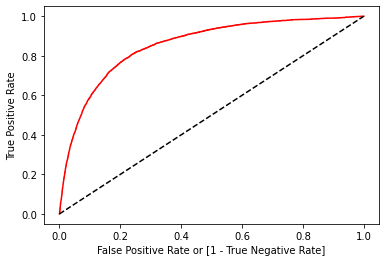

In [33]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [36]:
auc

0.60168182796688

In [34]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [35]:
fpr

array([0.        , 0.00002505, 0.0000501 , ..., 0.99812134, 0.99812134,
       1.        ])